In [8]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [2]:
#everything is in GeV
m_pion = 0.135
alpha = 1/137
dipole = pow(10,-6)
f_pi = 0.092
#capital_f = 1/(4*np.pi*f_pi)
capital_f = pow((4*np.pi*f_pi),-1)
m_nhl = 0.050
factor = -((1/(2*np.pi*m_pion))*pow(alpha,2)*pow(dipole,2)*pow(capital_f,2))

In [3]:
print(factor)

-4.6994804374214145e-17


In [4]:
def f(x):
    return factor*((np.sqrt(pow(x,2)-pow(m_nhl,2)))*(4*pow(x,2)*pow(m_pion,2)-3*x*m_pion*pow(m_nhl,2)-2*x*pow(m_pion,3)+pow(m_nhl,4)+3*pow(m_pion,2)*pow(m_nhl,2))-pow(m_pion,2)*(4*x-m_pion)*pow(m_nhl,2)*np.arctanh((np.sqrt(pow(x,2)-pow(m_nhl,2)))/x))

In [5]:
x_plot = np.arange(0.050,0.100,0.0001)

In [6]:
import scipy
from scipy import optimize

from scipy.optimize import fsolve
x = fsolve(f,100)
print(x)

[0.08181596]


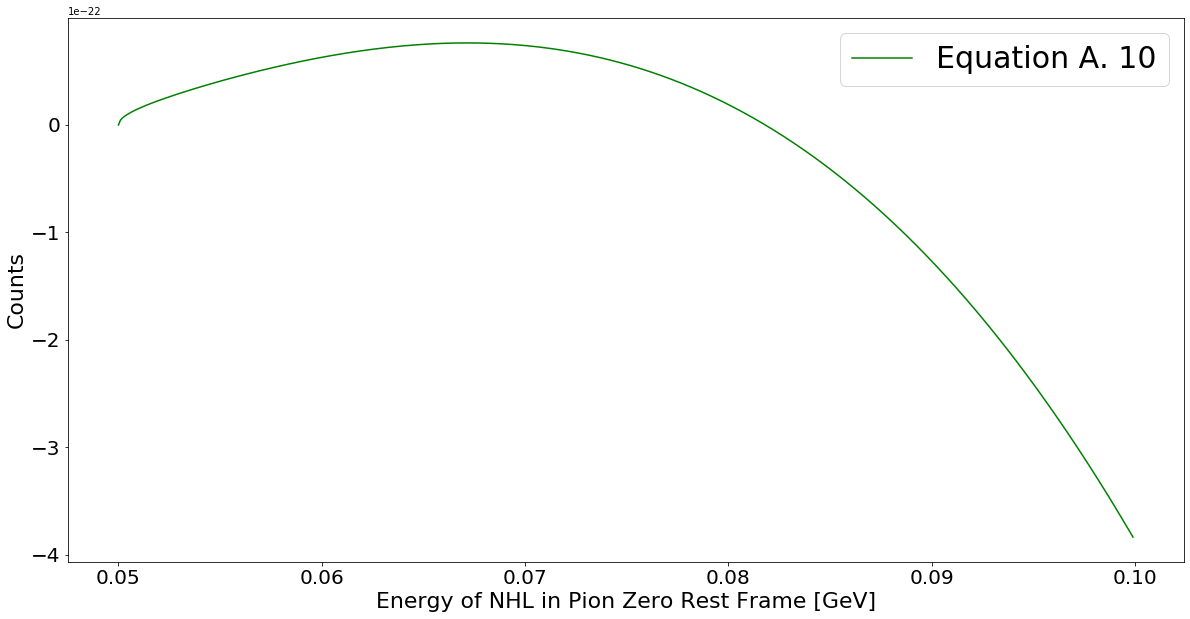

In [7]:
plt.figure(figsize=(20,10))
#plt.plot(x_plot,pion_plus_bis,'r',label='pion plus MC Integration')
#plt.plot(x_plot,pion_minus_bis,'-b',label='pion minus MC Integration')
plt.plot(x_plot,f(x_plot),'g',label='Equation A. 10')
plt.legend(loc="upper right",prop={'size': 30})
plt.xlabel("Energy of NHL in Pion Zero Rest Frame [GeV]",fontsize=22)
plt.ylabel("Counts",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [24]:
#####sampling energy from 55 to 77 MeV, cos(theta) from -1 to 1, and phi from 0 to 2*pi
angle_cos_theta = None
del angle_cos_theta
angle_phi = None
del angle_phi
energy = None
del energy
weight = None
del weight

angle_cos_theta = []
angle_phi = []
energy = []
weight = []

number = 1000

for i in range (number):
    angle_cos_theta.append(uniform(-1,1))
    angle_phi.append(uniform(0,2*np.pi))
    energy.append(uniform(50,77))
    weight.append(f(energy[i]))



In [25]:
a=0
print(angle_cos_theta[a], ' ', angle_phi[a],'', energy[a],'',weight[a])

-0.7645128255093219   0.486832645042245  68.04240886597036  -1.077940610913809e-12


In [26]:
sw_max=max(weight)
print(sw_max)

-4.279528809587586e-13


In [27]:
momentum = None
del momentum 

momentum = []

for i in range(number):
    momentum.append(np.sqrt(pow(energy[i],2)-pow(m_nhl,2)))

In [28]:
momentum_vector = None
del momentum_vector

momentum_vector = []

for i in range(number):
    momentum_vector.append((energy[i],momentum[i]*np.cos(angle_phi[i])*np.sin(np.arccos(angle_cos_theta[i])),momentum[i]*np.sin(angle_phi[i])*np.sin(np.arccos(angle_cos_theta[i])),momentum[i]*angle_cos_theta[i]))

In [29]:
print(momentum_vector[0])

(68.04240886597036, 38.76492695193905, 20.519303812296766, -52.019280211796215)
